<a href="https://colab.research.google.com/github/ArrEmm/Ruhi_SRISHTI_Assignments_Group4/blob/main/Copy_of_ML_Terms%26Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SRISHTI'23 Tutorial 03 <br>

# Machine learning terms and metrics
Module Coordinator: Amit Pandey amit.pandey@research.iiit.ac.in <br>
<br>

 In this lab, we will show a part of the ML pipeline by extracting features, training and testing. We will also explore how data augmentation affects accuracy.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. 

Let us download and examine the dataset. 

In [7]:
dataset =  datasets.fetch_california_housing()

In [8]:
dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [9]:
 
 print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(type(dataset.target[0]))
 print(dataset.data.shape)
 print(dataset.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

<ipython-input-9-94673d92a8a3>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [10]:
type(dataset), dataset.DESCR

(sklearn.utils._bunch.Bunch,
 '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of 

In [11]:
dataset.target

array([4, 3, 3, ..., 0, 0, 0])

In [3]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel



5,5
6,6
8,8


0,0

(0, 0)

We will also define a 'random classifier', which randomly allots labels to each sample

In [12]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. 

In [13]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [14]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [16]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [15]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [16]:
len(trainlabel)

12368

In [17]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


In [18]:
A = 15
B = 16
C = 10

5,5 -A
6,6 -B
7,7 -C

8,8 - A | C
0,0 -B | A   - 0

10,10     -A
15,15     -C

(15, 5)

## Interesting: See how train accuracy of nearest neighbour is 1 i.e. 100%. Ponder and Explain.

For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [31]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.3380108321024126
Validation accuracy using random classifier is  0.17626784835056622


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. 

Now let us try another random split and check the validation accuracy

In [30]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.3380108321024126


You can run the above cell multiple times to try with different random splits. 
We notice that the accuracy is different for each run, but close together. 

Now let us compare it with the accuracy we get on the test dataset. 

In [29]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced? 

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

Validation accuracy using nearest neighbour is  0.2
Validation accuracy using random classifier is  0.2
Validation accuracy using nearest neighbour is  0.3189873417721519
Validation accuracy using random classifier is  0.16582278481012658
Validation accuracy using nearest neighbour is  0.3488231744115872
Validation accuracy using random classifier is  0.17260108630054316
Validation accuracy using nearest neighbour is  0.33575405470830305
Validation accuracy using random classifier is  0.1692084241103849
Validation accuracy using nearest neighbour is  0.3316398037841626
Validation accuracy using random classifier is  0.16398037841625787
Validation accuracy using nearest neighbour is  0.3265001357588922
Validation accuracy using random classifier is  0.16929133858267717
Validation accuracy using nearest neighbour is  0.3232648528595225
Validation accuracy using random classifier is  0.16812881732370905
Validation accuracy using nearest neighbour is  0.3226798360044726
Validation accuracy

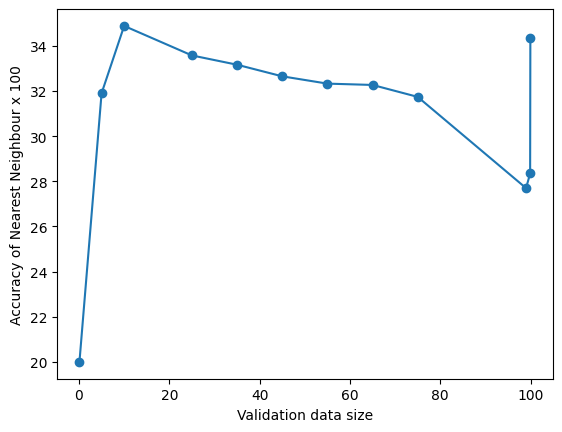

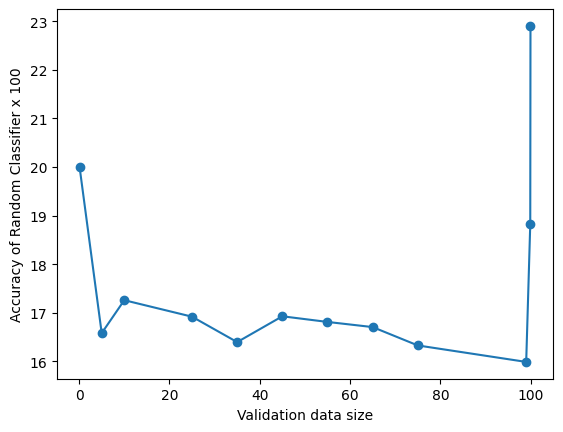

In [50]:
traindata_sizes=[99.9, 95, 90, 75,65,55,45,35,25,1,0.1,0.05]
valdata_sizes=[0.1,5,10,25,35,45,55,65,75,99,99.9,99.95]
accuracy_NN=[]
accuracy_RC=[]
for i in range (0,len(traindata_sizes)):
  traindata,trainlabel,valdata,vallabel=split(alltraindata,alltrainlabel,traindata_sizes[i]/100)
  valpred = NN(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  accuracy_NN.append(valAccuracy)
  print("Validation accuracy using nearest neighbour is ", valAccuracy)

  valpred = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  accuracy_RC.append(valAccuracy)
  print("Validation accuracy using random classifier is ", valAccuracy)
plt.plot(valdata_sizes,[a*100 for a in accuracy_NN],marker='o')
plt.xlabel("Validation data size")
plt.ylabel("Accuracy of Nearest Neighbour x 100")
plt.show()
plt.plot(valdata_sizes,[a*100 for a in accuracy_RC],marker='o')
plt.xlabel("Validation data size")
plt.ylabel("Accuracy of Random Classifier x 100")
plt.show()

In [40]:
traindata,trainlabel,valdata,vallabel=split(alltraindata,alltrainlabel,99.9/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
accuracy_NN.append(valAccuracy)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
accuracy_RC.append(valAccuracy)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.2777777777777778
Validation accuracy using random classifier is  0.16666666666666666


In [45]:
traindata,trainlabel,valdata,vallabel=split(alltraindata,alltrainlabel,0.1/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
accuracy_NN.append(valAccuracy)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
accuracy_RC.append(valAccuracy)
print("Validation accuracy using random classifier is ", valAccuracy)   #why is RC giving a higher accuracy? It should not change with the validation data size

Validation accuracy using nearest neighbour is  0.2751987377874871
Validation accuracy using random classifier is  0.2169427756538625


1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?

When we increase the percentage of the validation set, we decrease the percentage of training data. Thus, the model does not have enough samples to learn, and hence, its accuracy decreases with increase in percentage of validation set.

When we reduce the percentage of validation set, and increase the percentage of training data, we increase the accuracy of the model. However, if we decrease it too much, the accuracy goes down again.


2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

The size of the train and validation set has a specific effect on accuracy that we can map and plot, which helps us to predict the accuracy of the model for each pair of values of the same. Thus, we can adjust the sizes accordingly to gain the maximum accuracy.


3. What do you think is a good percentage to reserve for the validation set so that these two factors are balanced?

After running the model multiple times through K-fold validation, we observe that the best percentage of validation set for which we get the maximum accuracy(without anomaly) is 10%. Hence, to balance these 2 factors, validation set size of 10% and training set size of 90% is most suitable.

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. 

In [1]:
#100 --- 80 --- 75|5.   12345, 1234|5. 2345|1, 1345|2


In [4]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [23]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 30, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3415102927673725
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?

Yes, this does provide us with more consistent results, because, as splitting is random, it is more advantageous to consider many trials rather than just one.

2. Does it give more accurate estimate of test accuracy?

Yes, we get a more accurate estimate of test accuracy, since we are taking the average of multiple iterations, instead of just comparing a single iteration.

3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

Yes, we tend to get a better estimate with more number of iterations.

4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

We can certainly improve the accuracy when we have smaller train or validation dataset by increasing the number of iterations. However, this is to a very small extent.


## Now let us see how augmentation affects accuracy. We will pick components from what we studied in the last module

we will experiment with MNIST dataset


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print(train_X[0].shape,train_y[0])



11490434/11490434 [==============================] - 0s 0us/step
(28, 28) 5


In [26]:
train_X = train_X/255
test_X = test_X/255

train_X[0].shape, train_X[0]

((28, 28),
 array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00

In [27]:
train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy() # do the same to the labels

In [28]:
## Augmentation functions:



def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample

  print("shape of sample before is:", sample.shape)
  print("len(sample.shape)", len(sample.shape))
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
    print("shape of sample is:", sample.shape)
  angle = rng.random(len(sample)) # generate random numbers for angles
  print("angle is:", angle)
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  print("angle with constraint is:", angle)
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.


def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  traindata = traindata.reshape(-1, 28*28)
  testdata = testdata.reshape(-1,28*28)
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In [38]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount) # create the shear transform
  img = warp(sample, tform) # apply the shear
  # this makes the digit off-center. Since all the images in the test set are centralized, we will do the same here
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

def augShear(sample, shearconstraint):
  if shearconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  amt = rng.random(len(sample)) # generate random numbers for shear
  amt = (amt-0.5)*shearconstraint # make the random shear constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = shear(sample[ii], amt[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.




In this lab, we will use the image pixels themselves as features, instead of extracting features. Each image has 28*28 pixels, so we will flatten them to 784 pixels to use as features. Note that this is very compute intensive and will take a long time.

Let us check the baseline accuracy on the test set without any augmentations. We hope that adding augmentations will help us to get better results.

In [29]:
testpred = NN(train_X, train_y, test_X)
print('Baseline accuracy without augmentation is ', Accuracy(test_y, testpred))

Baseline accuracy without augmentation is  0.6472


Let us try to improve this accuracy using augmentations. When we create augmentations, we have to make sure that the changes reflect what will naturally occur in the dataset. For example, we should not add colour to our samples as an augmentation because they do not naturally occur. We should not also flip the images in MNIST, because flipped images have different meanings for digits.

Let us augment the whole dataset and see if this improves the test accuracy

In [32]:
# hyperparameters
angleconstraint = 60
naugmentations = 10

# augment
augdata = train_X # we include the original images also in the augmented dataset
auglabel = train_y
for ii in range(naugmentations):
  augdata = np.concatenate((augdata, augRotate(train_X, angleconstraint))) # concatenate the augmented data to the set
  auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

# check the test accuracy
testpred = NN(augdata, auglabel, test_X)
print('Accuracy after rotation augmentation is ', Accuracy(test_y, testpred))

shape of sample before is: (50, 28, 28)
len(sample.shape) 3
angle is: [0.78865504 0.16215577 0.14449222 0.20419531 0.68332036 0.97962899
 0.39661879 0.54822799 0.8308091  0.61979246 0.69592719 0.90590308
 0.70055314 0.3406917  0.61509893 0.99565725 0.03867346 0.63296756
 0.62506958 0.11991385 0.51694083 0.30923654 0.52100241 0.57274258
 0.99760743 0.70762576 0.51543987 0.58046869 0.48887618 0.86706351
 0.04831054 0.2211894  0.89976868 0.22339923 0.3874936  0.73719636
 0.38068333 0.01293102 0.60144935 0.82802904 0.38954267 0.13299068
 0.83562741 0.02407646 0.50518569 0.20729555 0.5975299  0.35888576
 0.82126514 0.16322842]
angle with constraint is: [ 17.31930245 -20.27065368 -21.33046694 -17.74828116  10.99922131
  28.77773925  -6.20287243   2.89367929  19.84854612   7.18754761
  11.75563146  24.35418455  12.03318823  -9.55849825   6.90593588
  29.73943519 -27.67959252   7.97805384   7.50417481 -22.8051692
   1.01644963 -11.44580733   1.26014457   4.3645546   29.85644564
  12.45754579  

The angle constraint is a hyperparameter which we have to tune using a validation set. (Here we are not doing that for time constraints). Let us try a grid search to find the best angle constraint.

In [33]:
angleconstraints = [0,10,20,30,40,50,60,70,80,90] # the values we want to test
accuracies = np.zeros(len(angleconstraints), dtype=np.float) # we will save the values here

for ii in range(len(angleconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotate(train_X, angleconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after rotation augmentation constrained by ',angleconstraints[ii], ' is ', accuracies[ii], flush=True)

<ipython-input-33-2f14d3721156>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(angleconstraints), dtype=np.float) # we will save the values here


Accuracy after rotation augmentation constrained by  0  is  0.6472
shape of sample before is: (50, 28, 28)
len(sample.shape) 3
angle is: [0.53258687 0.30421144 0.43220435 0.97537659 0.35718957 0.39717526
 0.90429519 0.83997898 0.0459793  0.18927241 0.11851795 0.67499153
 0.70757851 0.10575611 0.06860434 0.9657334  0.12790963 0.4896755
 0.1001005  0.714734   0.50264254 0.94684141 0.90613272 0.88798945
 0.05221544 0.77309109 0.96685304 0.14278649 0.1416825  0.86158208
 0.01942199 0.80659482 0.93137235 0.96246705 0.35526491 0.82874509
 0.54240857 0.65966171 0.91488729 0.40846072 0.34512435 0.22011037
 0.95790219 0.3479516  0.24739862 0.35568526 0.27617219 0.94897159
 0.76327268 0.65964221]
angle with constraint is: [ 0.32586874 -1.95788561 -0.67795645  4.75376591 -1.42810429 -1.02824742
  4.04295191  3.39978983 -4.54020701 -3.10727586 -3.8148205   1.7499153
  2.07578506 -3.94243889 -4.31395664  4.65733404 -3.72090366 -0.10324497
 -3.99899502  2.14733995  0.02642543  4.46841413  4.06132716

In [34]:
#Accuracy after rotation augmentation constrained by  90  is  0.6467

Let us see the best value for angle constraint: (Ideally this should be done on validation set, not test set)

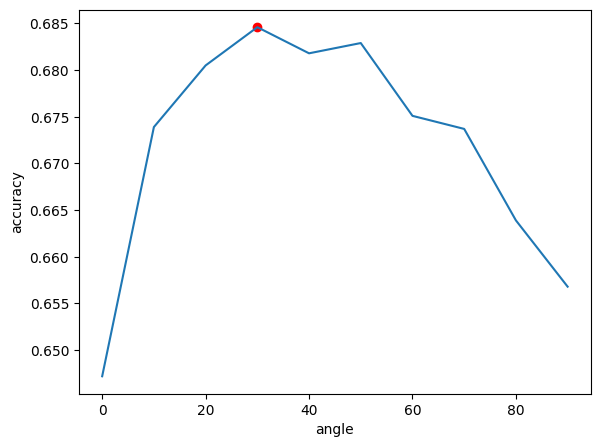

In [36]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(angleconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c='red')

Let us do a grid search to find the best shear constraint.

In [39]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0] # the values we want to test
accuracies = np.zeros(len(shearconstraints), dtype=np.float) # we will save the values here

for ii in range(len(shearconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augShear(train_X, shearconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after shear augmentation constrained by ',shearconstraints[ii], ' is ', accuracies[ii], flush=True)

<ipython-input-39-8a89fef4983d>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(shearconstraints), dtype=np.float) # we will save the values here


Accuracy after shear augmentation constrained by  0  is  0.6472
Accuracy after shear augmentation constrained by  0.2  is  0.6164
Accuracy after shear augmentation constrained by  0.4  is  0.6358
Accuracy after shear augmentation constrained by  0.6  is  0.6497
Accuracy after shear augmentation constrained by  0.8  is  0.6545
Accuracy after shear augmentation constrained by  1.0  is  0.653
Accuracy after shear augmentation constrained by  1.2  is  0.6531
Accuracy after shear augmentation constrained by  1.4  is  0.6348
Accuracy after shear augmentation constrained by  1.6  is  0.6221
Accuracy after shear augmentation constrained by  1.8  is  0.6247
Accuracy after shear augmentation constrained by  2.0  is  0.6073


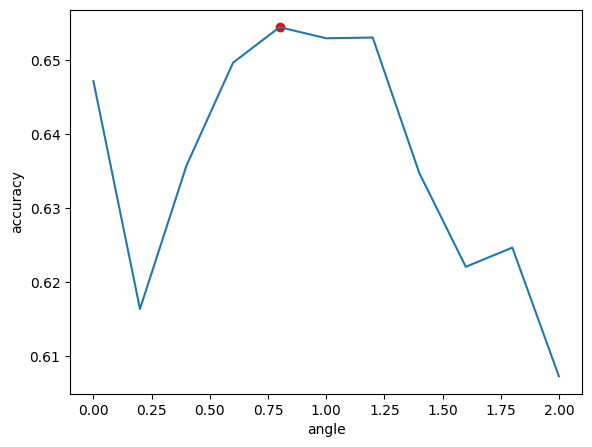

In [40]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(shearconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c='red')

We can do multiple augmentations at the same time. Here is a function to do both shear and rotation to the sample. In this case, we will have two hyperparameters.

In [ ]:
def augRotateShear(sample, angleconstraint, shearconstraint):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  amt = rng.random(len(sample)) # generate random numbers for shear
  amt = (amt-0.5)*shearconstraint # make the random shear constrained
  angle = rng.random(len(sample)) # generate random numbers for angles
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(shear(sample[ii], amt[ii]), angle[ii]) # first apply shear, then rotate
  return np.squeeze(nsample) # take care if the input had only one sample.

Since we have two hyperparameters, we have to do the grid search on a 2 dimensional matrix. We can use our previous experience to inform where to search for the best hyperparameters. 

In [ ]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6] # the values we want to test
angleconstraints = [0,10,20,30,40,50,60] # the values we want to test
hyp = cartesian((shearconstraints, angleconstraints)) # cartesian product of both

accuracies = np.zeros(len(hyp), dtype=np.float) # we will save the values here

for ii in range(len(hyp)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotateShear(train_X, hyp[ii][0], hyp[ii][1]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after augmentation shear:',hyp[ii][0], 'angle:',hyp[ii][1], ' is ', accuracies[ii], flush=True)

<ipython-input-52-09de780976d0>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(hyp), dtype=np.float) # we will save the values here


Accuracy after augmentation shear: 0.0 angle: 0.0  is  0.6332
Accuracy after augmentation shear: 0.0 angle: 10.0  is  0.6057
Accuracy after augmentation shear: 0.0 angle: 20.0  is  0.596
Accuracy after augmentation shear: 0.0 angle: 30.0  is  0.6142
Accuracy after augmentation shear: 0.0 angle: 40.0  is  0.6015
Accuracy after augmentation shear: 0.0 angle: 50.0  is  0.6103
Accuracy after augmentation shear: 0.0 angle: 60.0  is  0.5736
Accuracy after augmentation shear: 0.2 angle: 0.0  is  0.6334
Accuracy after augmentation shear: 0.2 angle: 10.0  is  0.6096
Accuracy after augmentation shear: 0.2 angle: 20.0  is  0.5994
Accuracy after augmentation shear: 0.2 angle: 30.0  is  0.5942
Accuracy after augmentation shear: 0.2 angle: 40.0  is  0.5971
Accuracy after augmentation shear: 0.2 angle: 50.0  is  0.6032
Accuracy after augmentation shear: 0.2 angle: 60.0  is  0.6162
Accuracy after augmentation shear: 0.4 angle: 0.0  is  0.6335
Accuracy after augmentation shear: 0.4 angle: 10.0  is  0.5

Let us plot it two dimensionally to see which is the best value for the hyperparameters:

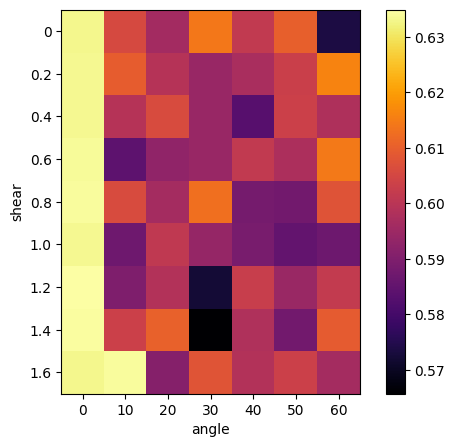

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
im = ax.imshow(accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap='inferno') 
ax.set_xlabel('angle')
ax.set_ylabel('shear')
ax.set_xticks(np.arange(len(angleconstraints)));
ax.set_xticklabels(angleconstraints);
ax.set_yticks(np.arange(len(shearconstraints)));
ax.set_yticklabels(shearconstraints);
plt.colorbar(im)

It seems that rotation and shear don't mix! The best accuracy is when rotation is zero.

## Questions
Try these questions for better understanding. You may not be able to solve all of them. 
1. What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?

The best value for angle constraint was 30, and the best value for shear constraint was 1.0. 
The accuracy improved drastically compared to the value without augmentation, we were getting ~0.34 as the accuracy without augmentation, but with augmentation, we are getting 0.65-0.68 as the accuracy, which is nearly double.

2. Can you increase the accuracy by increasing the number of augmentations from each sample?

Yes, we can increase the accuracy by increasing number of augmentations, so that the model works well even with limited dataset.


3. Try implementing a few augmentations of your own and experimenting with them. A good reference is <a href=https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/>here. </a>


4. Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?

Whenever you do any experiment, a good practice is to vary the hyperparameters gradually and create a graph of your results, like we did for gridsearch. 